In [16]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


Ejercicio 1

In [2]:
def evaluate(model, test_images, test_labels):
  test_loss, test_acc = model.evaluate(test_images,  test_labels)
  print(f"Error en el conjunto de test: {1 - test_acc}")

In [3]:
def graph_errores(history, model):
  error_train = list(map(lambda x: 1-x, history.history['accuracy']))
  error_val = list(map(lambda x: 1-x,  history.history['val_accuracy']))

  plt.plot(error_train, label='Error train')
  plt.plot(error_val, label = 'Error validacion')
  plt.xlabel('Épocas')
  plt.ylabel('Error')
  plt.legend()
  plt.show()

In [4]:
def get_dataset(dataset):
  (train_images, train_labels), (test_images, test_labels) = dataset.load_data()

  # Normalize pixel values to be between 0 and 1
  train_images, test_images = train_images / 255.0, test_images / 255.0

  return train_images, train_labels, test_images, test_labels

In [5]:
def ej1_fit(model):
  train_images, train_labels, test_images, test_labels = get_dataset(datasets.cifar10)

  train_images, val_images, train_labels, val_labels = train_test_split(
      train_images, train_labels, test_size=0.2, random_state=0
      )

  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  history = model.fit(train_images, train_labels, epochs=10, 
                      validation_data=(val_images, val_labels))
  
  return history, model, test_images, test_labels

In [6]:
def ej1():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))

  model.add(layers.Flatten())

  model.add(layers.Dense(64))
  model.add(layers.Dense(128))
  model.add(layers.Dense(128))
  model.add(layers.Dense(10))

  return ej1_fit(model)

In [7]:
history, fit_model, test_images, test_labels = ej1()

170508288/170498071 [==============================] - 14s 0us/step
Epoch 1/10
1250/1250 [==============================] - 19s 5ms/step - loss: 1.5245 - accuracy: 0.4425 - val_loss: 1.3170 - val_accuracy: 0.5294
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0985 - accuracy: 0.6109 - val_loss: 1.0344 - val_accuracy: 0.6377
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9100 - accuracy: 0.6790 - val_loss: 0.9581 - val_accuracy: 0.6617
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8053 - accuracy: 0.7163 - val_loss: 0.9061 - val_accuracy: 0.6864
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7240 - accuracy: 0.7448 - val_loss: 0.8568 - val_accuracy: 0.7050
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6478 - accuracy: 0.7728 - val_loss: 0.8619 - val_accuracy: 0.7047
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step

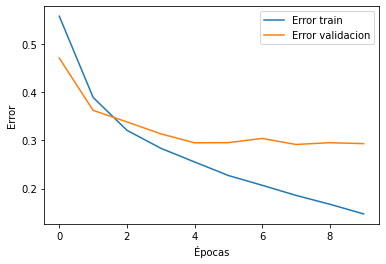

313/313 [==============================] - 1s 3ms/step - loss: 0.9956 - accuracy: 0.7016
Error en el conjunto de test: 0.29839998483657837


In [8]:
graph_errores(history, fit_model)
evaluate(fit_model, test_images, test_labels)

Con este modelo, se logró un error de aproximadamente 0.3 sobre el conjunto de test. A partir del gráfico se puede observar también que se produjo sobreajuste en las primeras épocas. 

---

In [10]:
def ej2_fit(model):
  train_images, train_labels, test_images, test_labels = get_dataset(datasets.cifar10)

  train_images, val_images, train_labels, val_labels = train_test_split(
      train_images, train_labels, test_size=0.2, random_state=0
      )

  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  history = model.fit(train_images, train_labels, epochs=20, 
                      validation_data=(val_images, val_labels))

  return history, model, test_images, test_labels

In [11]:
def ej2(p):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))

  model.add(layers.Dropout(p, input_shape=(32, 32, 3)))
  model.add(layers.Flatten())

  model.add(layers.Dense(64))
  model.add(layers.Dropout(p, input_shape=(32, 32, 3)))

  model.add(layers.Dense(128))
  model.add(layers.Dense(128))
  model.add(layers.Dense(10))

  return ej2_fit(model)

Regularización por dropout con p = 0.2
Epoch 1/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5839 - accuracy: 0.4133 - val_loss: 1.2935 - val_accuracy: 0.5254
Epoch 2/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2098 - accuracy: 0.5671 - val_loss: 1.1675 - val_accuracy: 0.5949
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0388 - accuracy: 0.6356 - val_loss: 0.9735 - val_accuracy: 0.6558
Epoch 4/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.9256 - accuracy: 0.6756 - val_loss: 0.9032 - val_accuracy: 0.6830
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8444 - accuracy: 0.7052 - val_loss: 0.8489 - val_accuracy: 0.7008
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7806 - accuracy: 0.7239 - val_loss: 0.8669 - val_accuracy: 0.7021
Epoch 7/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7271 - accuracy: 0.

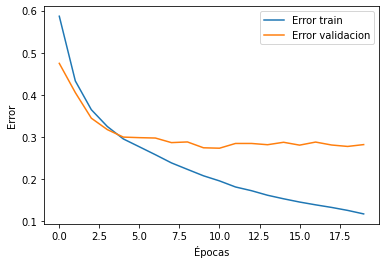

313/313 [==============================] - 1s 3ms/step - loss: 1.0787 - accuracy: 0.7122
Error en el conjunto de test: 0.28780001401901245



Regularización por dropout con p = 0.5
Epoch 1/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.6527 - accuracy: 0.3853 - val_loss: 1.3075 - val_accuracy: 0.5231
Epoch 2/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.3028 - accuracy: 0.5341 - val_loss: 1.2601 - val_accuracy: 0.5592
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1773 - accuracy: 0.5800 - val_loss: 1.0331 - val_accuracy: 0.6291
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0762 - accuracy: 0.6224 - val_loss: 0.9664 - val_accuracy: 0.6611
Epoch 5/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.0056 - accuracy: 0.6489 - val_loss: 0.9710 - val_accuracy: 0.6626
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9536 - accuracy: 0.66

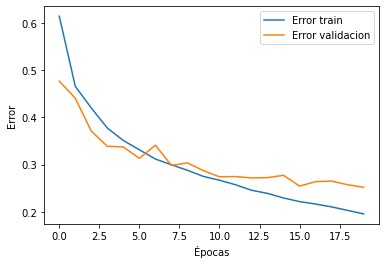

313/313 [==============================] - 1s 3ms/step - loss: 0.8037 - accuracy: 0.7457
Error en el conjunto de test: 0.25429999828338623





In [13]:
for p in [0.2, 0.5]:
  print(f"Regularización por dropout con p = {p}")
  history, fit_model, test_images, test_labels = ej2(p)
  graph_errores(history, fit_model)
  evaluate(fit_model, test_images, test_labels)
  print("\n\n")

Para p = 0.2 se puede ver que se produce sobreajuste a partir de las tres épocas. En cambio, para p = 0.5 esto se soluciona considerablemente hasta las últimas épocas en donde se puede apreciar cierto sobreajuste. Quizá aumentando la cantidad de épocas encontremos más sobreajuste y tengamos que reconsiderar dónde realizar los dropouts y con qué valores de p. Para p = 0.5, también, se puede apreciar que el error de test es menor que para 0.2. 

In [14]:
def ej3():
  img_height = 32
  img_width = 32
  data_augmentation = keras.Sequential(
      [
            layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
            layers.RandomRotation(0.1),
            layers.RandomZoom(0.1),
      ]
  )

  model = models.Sequential()
  model.add(data_augmentation)
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))

  # p = 0.5 fue el dropout óptimo del ejercicio anterior.
  model.add(layers.Dropout(0.5, input_shape=(32, 32, 3)))
  model.add(layers.Flatten())

  model.add(layers.Dense(64))
  model.add(layers.Dropout(0.5, input_shape=(32, 32, 3)))

  model.add(layers.Dense(128))
  model.add(layers.Dense(128))
  model.add(layers.Dense(10))

  return ej2_fit(model)

In [17]:
history, fit_model, test_images, test_labels = ej3()

Epoch 1/20
1250/1250 [==============================] - 10s 7ms/step - loss: 1.7803 - accuracy: 0.3442 - val_loss: 1.4267 - val_accuracy: 0.4686
Epoch 2/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5577 - accuracy: 0.4313 - val_loss: 1.3988 - val_accuracy: 0.5005
Epoch 3/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4530 - accuracy: 0.4745 - val_loss: 1.2174 - val_accuracy: 0.5622
Epoch 4/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3891 - accuracy: 0.5037 - val_loss: 1.1972 - val_accuracy: 0.5690
Epoch 5/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3326 - accuracy: 0.5242 - val_loss: 1.2303 - val_accuracy: 0.5602
Epoch 6/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2913 - accuracy: 0.5421 - val_loss: 1.1619 - val_accuracy: 0.5884
Epoch 7/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2713 - accuracy: 0.5526 - val_loss: 1.1123 - val_accuracy

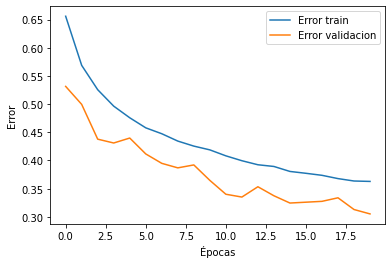

313/313 [==============================] - 1s 3ms/step - loss: 0.9267 - accuracy: 0.6872
Error en el conjunto de test: 0.31279999017715454


In [18]:
graph_errores(history, fit_model)
evaluate(fit_model, test_images, test_labels)

A diferencia del modelo anterior, vemos que no se produce sobreajuste. Sin embargo, el error sobre el conjunto de test es mayor (aprox. 0.31 contra aprox. 0.25) por lo cual nos queda que la capa de data augmentation es útil solo para evitar el sobreajuste.  